In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from SciKit.utils import show_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [14]:
# Load the data
X, y = make_classification(n_samples=2000, n_features=10, n_informative=8, n_redundant=2, random_state=14)

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [16]:
# Create the AdaBoost model
ada = AdaBoostClassifier()

# Train the model
ada.fit(X_train, y_train)

# Evaluate the model
y_pred = ada.predict(X_test)

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.72      0.71       316
           1       0.68      0.67      0.68       284

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600

Accuracy:  0.695


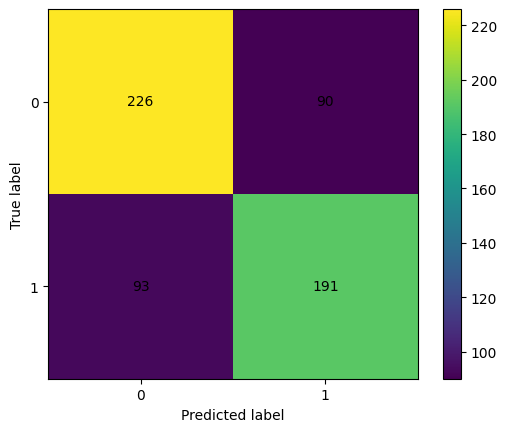

Confusion Matrix: 
 [[226  90]
 [ 93 191]]


In [17]:
# Show the report
show_report(y_test, y_pred) # 0.695 % accuracy

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       280
           1       0.72      0.63      0.68       320

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.67       600
weighted avg       0.68      0.68      0.68       600



C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.675


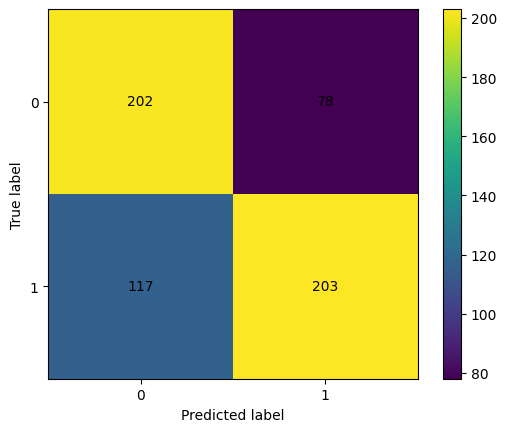

Confusion Matrix: 
 [[202  78]
 [117 203]]


In [18]:
# Using Logistic Regression as the base estimator
lr_estimator = LogisticRegression()

ada_lr = AdaBoostClassifier(estimator=lr_estimator)

# Train the model
ada_lr.fit(X_train, y_train)

# Evaluate the model
y_pred2 = ada_lr.predict(X_test)

# Show the report
show_report(y_test, y_pred2) # 0.675 % accuracy

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       292
           1       0.94      0.85      0.89       308

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.89       600
weighted avg       0.90      0.90      0.89       600

Accuracy:  0.895


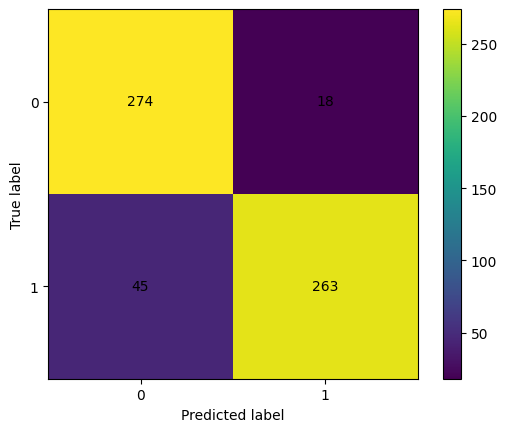

Confusion Matrix: 
 [[274  18]
 [ 45 263]]


In [19]:
# Using SVC as the base estimator

svc_estimator = SVC(probability=True)

ada_svc = AdaBoostClassifier(estimator=svc_estimator)

# Train the model
ada_svc.fit(X_train, y_train)

# Evaluate the model
y_pred3 = ada_svc.predict(X_test)

# Show the report
show_report(y_test, y_pred3) # 0.895 % accuracy

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.74      0.73       308
           1       0.72      0.69      0.70       292

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600

Accuracy:  0.715


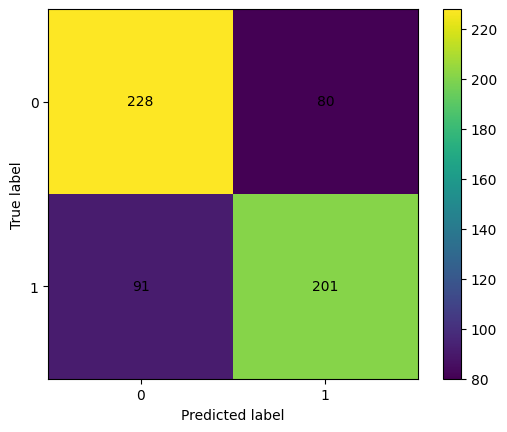

Confusion Matrix: 
 [[228  80]
 [ 91 201]]
Best parameters: {'n_estimators': 50, 'learning_rate': 0.5}


In [23]:
# Parameter tuning

param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

grid_search = RandomizedSearchCV(ada, param_grid, cv=3, n_iter=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Evaluate the model
y_pred4 = grid_search.predict(X_test)

# Show the report
show_report(y_test, y_pred4)

best_params = grid_search.best_params_
print('Best parameters:', best_params)